# Drought Network Weighted Nexus

9.22.2022, a. stein

So this is a bit of an experimental idea. In exploring the CAF plots, I came to realize that just because the percent of the state in drought might be the same between two measures, doesn't mean it's the same drought. Only considering this aggregated measure looses the diverse topography of the state and the nuances in how drought evolves differently between metrics. This makes the drought network, and examining overlapping events (`explore/drought_network_overlap.ipynb`), rather important when comparing drought evolution and describing similarities ... which can be done with side-by-side animations that were also developed in that notebook, but it would be helpful to have more analytic means of comparing.

This is where the Drought Nexus takes actual shape. I plan to connect the graphs of multiple drought networks via these overlaps. To preserve identification of which node goes to which measure, I'll need to rename the id's something like `dm_{i}`. But then there is one further step I want to take: weighting the graph by area ratios. Each edge will be weighted as a ratio of origin_area to destination_area (if a --> b, then the weight of their connecting edge would be b_area/a_area). This will allow for an understanding of how the drought event is growing (weight > 1), shrinking (weight < 1), or staying the same (weight = 1). As for the weights then between drought measure graphs, which is the numerator and which the denominator will need to be specified ... or an edge could be created each way, following destination_area/origin_area

With the Drought Nexus graph, I can visualize connectivity patterns between all the drought metrics, and see what is commonly agreed upon and what is unique.

In [1]:
%pylab inline
%load_ext autoreload
%autoreload 2
%reload_ext autoreload

import xarray as xr
import rioxarray
import rasterio as rio
import pandas as pd
import geopandas as gpd
import networkx as nx

import matplotlib.dates as mdates

from tqdm.autonotebook import tqdm

import sys
sys.path.append('../../')
import ndrought.wrangle as wrangle
import ndrought.compare as compare
import ndrought.plotting as ndplot
import ndrought.drought_network as dnet

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


/tmp/ipykernel_2720701/2338660029.py:15: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


Bring in some data. We're going to start with connecting USDM and PDSI as done in `explore/drought_network_overlap.ipynb`

In [2]:
dm_path = '/pool0/home/steinadi/data/drought/drought_impact/data/drought_measures'

In [3]:
usdm = xr.open_dataset(f'{dm_path}/usdm/USDM_WA_20000104_20220412.nc')

In [4]:
usdm_net = dnet.DroughtNetwork.unpickle(f'{dm_path}/usdm/usdm_WA_net.pickle')

In [5]:
pdsi = xr.open_dataset(f'{dm_path}/pdsi/WA/pdsi_usdmcat_WA.nc')

In [6]:
pdsi_net = dnet.DroughtNetwork.unpickle(f'{dm_path}/pdsi/WA/pdsi_WA_net.pickle')

In [7]:
matched_dates = compare.pair_to_usdm_date(pd.to_datetime(usdm.date.values), pd.to_datetime(pdsi.day.values), 'PDSI', realign=True)

/pool0/data/steinjao/drought/drought_impact/notebooks/explore/../../ndrought/compare.py:125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pair_dates['USDM Date'].iloc[i-1] = date
/pool0/data/steinjao/drought/drought_impact/notebooks/explore/../../ndrought/compare.py:128: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.
  pair_dates = pair_dates.dropna('index')


In [8]:
pdsi_date_idx = []

for date in matched_dates['PDSI'].values:
    pdsi_date_idx.append(np.where(pdsi.day.values == date)[0][0])
usdm_date_idx = []

for date in matched_dates['USDM Date'].values:
    usdm_date_idx.append(np.where(usdm.date.values == date)[0][0])
    
matched_dates_dict = dict()
for usdm_date, pdsi_date in zip(usdm_date_idx, pdsi_date_idx):
    matched_dates_dict[usdm_date] = pdsi_date

In [9]:
overlap_events = usdm_net.find_overlapping_nodes_events(pdsi_net, matched_dates_dict)

  0%|          | 0/86991324 [00:00<?, ?it/s]

First let's try just weighting a graph

In [10]:
thread_893 = usdm_net.get_chronological_future_thread(id=893)
ids_893 = [node.id for node in thread_893]
adj_dict_893 = usdm_net.filter_adj_dict_by_id(ids_893)

In [11]:
G = nx.DiGraph(adj_dict_893)

Let's double check the DiGraph was made correclty ... all arrows should be pointing one way ...

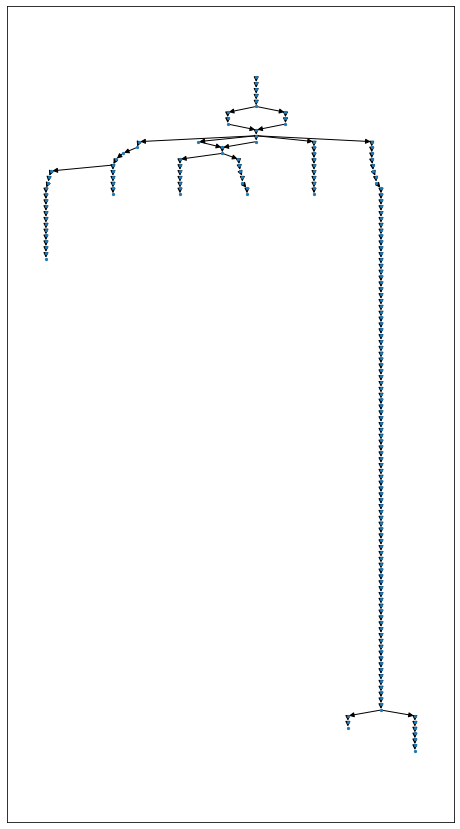

In [12]:
fig, ax = plt.subplots(figsize=(8,15))

nx.draw_networkx(G, usdm_net.get_nx_pos(G), with_labels=False, node_size=5, ax=ax)

Yup. Beautiful.

Let's now try the new naming scheme

In [13]:
adj_dict_893_renamed = dict()

for key in adj_dict_893.keys():
    vals = []
    for val in adj_dict_893[key]:
        vals.append(f'usdm_{val}')
    adj_dict_893_renamed[f'usdm_{key}'] = vals

In [14]:
G_renamed = nx.MultiDiGraph(adj_dict_893_renamed)

In [15]:
G_renamed.nodes

NodeView(('usdm_893', 'usdm_903', 'usdm_913', 'usdm_923', 'usdm_933', 'usdm_943', 'usdm_953', 'usdm_952', 'usdm_955', 'usdm_954', 'usdm_957', 'usdm_956', 'usdm_958', 'usdm_959', 'usdm_964', 'usdm_963', 'usdm_962', 'usdm_961', 'usdm_960', 'usdm_968', 'usdm_967', 'usdm_966', 'usdm_965', 'usdm_972', 'usdm_971', 'usdm_970', 'usdm_969', 'usdm_977', 'usdm_976', 'usdm_975', 'usdm_974', 'usdm_973', 'usdm_982', 'usdm_981', 'usdm_980', 'usdm_979', 'usdm_978', 'usdm_988', 'usdm_987', 'usdm_986', 'usdm_985', 'usdm_984', 'usdm_983', 'usdm_994', 'usdm_993', 'usdm_992', 'usdm_991', 'usdm_990', 'usdm_989', 'usdm_1000', 'usdm_999', 'usdm_998', 'usdm_997', 'usdm_996', 'usdm_995', 'usdm_1006', 'usdm_1005', 'usdm_1004', 'usdm_1003', 'usdm_1002', 'usdm_1001', 'usdm_1012', 'usdm_1011', 'usdm_1010', 'usdm_1009', 'usdm_1008', 'usdm_1007', 'usdm_1014', 'usdm_1013', 'usdm_1016', 'usdm_1015', 'usdm_1018', 'usdm_1017', 'usdm_1020', 'usdm_1019', 'usdm_1022', 'usdm_1021', 'usdm_1024', 'usdm_1023', 'usdm_1026', 'usd

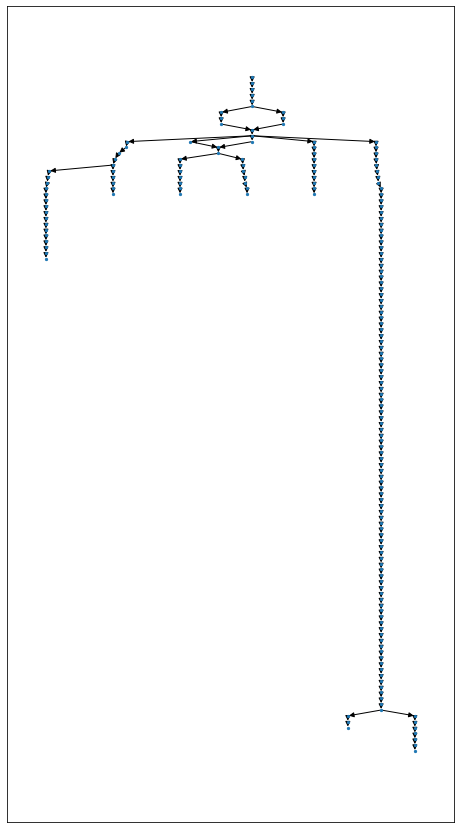

In [16]:
fig, ax = plt.subplots(figsize=(8,15))

nx.draw_networkx(G_renamed, usdm_net.get_nx_pos(G_renamed), with_labels=False, node_size=5, ax=ax)

This may be useful for future: https://networkx.org/documentation/latest/reference/generated/networkx.relabel.relabel_nodes.html#networkx.relabel.relabel_nodes

Ayyy, that worked. Now for weights.

In [17]:
G = G_renamed

In [18]:
adj_dict_893

{893: [903],
 903: [913],
 913: [923],
 923: [933],
 933: [943],
 943: [952, 953],
 953: [955],
 952: [954],
 955: [957],
 954: [956],
 957: [958],
 956: [958],
 958: [959],
 959: [960, 961, 962, 963, 964],
 964: [968],
 963: [967],
 962: [967],
 961: [966],
 960: [965],
 968: [972],
 967: [971],
 966: [970],
 965: [969],
 972: [977],
 971: [975, 976],
 970: [974],
 969: [973],
 977: [982],
 976: [981],
 975: [980],
 974: [979],
 973: [978],
 982: [987, 988],
 981: [986],
 980: [985],
 979: [984],
 978: [983],
 988: [994],
 987: [993],
 986: [992],
 985: [991],
 984: [990],
 983: [989],
 994: [1000],
 993: [999],
 992: [998],
 991: [997],
 990: [996],
 989: [995],
 1000: [1006],
 999: [1005],
 998: [1004],
 997: [1003],
 996: [1002],
 995: [1001],
 1006: [1012],
 1005: [1011],
 1004: [1010],
 1003: [1009],
 1002: [1008],
 1001: [1007],
 1012: [1014],
 1011: [],
 1010: [],
 1009: [],
 1008: [],
 1007: [1013],
 1014: [1016],
 1013: [1015],
 1016: [1018],
 1015: [1017],
 1018: [1020],
 10

In [19]:
edges = []

for key in adj_dict_893.keys():
    for val in adj_dict_893[key]:
        edges.append((key, val, 0))

In [20]:
edges

[(893, 903, 0),
 (903, 913, 0),
 (913, 923, 0),
 (923, 933, 0),
 (933, 943, 0),
 (943, 952, 0),
 (943, 953, 0),
 (953, 955, 0),
 (952, 954, 0),
 (955, 957, 0),
 (954, 956, 0),
 (957, 958, 0),
 (956, 958, 0),
 (958, 959, 0),
 (959, 960, 0),
 (959, 961, 0),
 (959, 962, 0),
 (959, 963, 0),
 (959, 964, 0),
 (964, 968, 0),
 (963, 967, 0),
 (962, 967, 0),
 (961, 966, 0),
 (960, 965, 0),
 (968, 972, 0),
 (967, 971, 0),
 (966, 970, 0),
 (965, 969, 0),
 (972, 977, 0),
 (971, 975, 0),
 (971, 976, 0),
 (970, 974, 0),
 (969, 973, 0),
 (977, 982, 0),
 (976, 981, 0),
 (975, 980, 0),
 (974, 979, 0),
 (973, 978, 0),
 (982, 987, 0),
 (982, 988, 0),
 (981, 986, 0),
 (980, 985, 0),
 (979, 984, 0),
 (978, 983, 0),
 (988, 994, 0),
 (987, 993, 0),
 (986, 992, 0),
 (985, 991, 0),
 (984, 990, 0),
 (983, 989, 0),
 (994, 1000, 0),
 (993, 999, 0),
 (992, 998, 0),
 (991, 997, 0),
 (990, 996, 0),
 (989, 995, 0),
 (1000, 1006, 0),
 (999, 1005, 0),
 (998, 1004, 0),
 (997, 1003, 0),
 (996, 1002, 0),
 (995, 1001, 0),


In [21]:
usdm_net.nodes[903].area/usdm_net.nodes[893].area

1.705041095890411

In [22]:
edge_attr_dict = dict()

for edge in edges:
    source_area = usdm_net.nodes[edge[0]].area
    destination_area = usdm_net.nodes[edge[1]].area
    weight = destination_area/source_area

    edge_attr_dict[edge] = {"weight": weight}

In [23]:
for key in edge_attr_dict.keys():
    G[f'usdm_{key[0]}'][f'usdm_{key[1]}'][0]["weight"] = edge_attr_dict[key]["weight"]

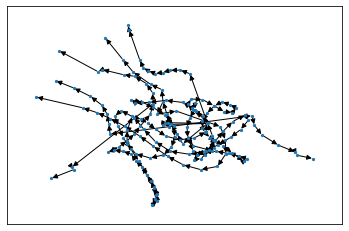

In [24]:
nx.draw_networkx(G, with_labels=False, node_size=5)

Oh neat, can see the weight via how long the arrows are I think

In [25]:
nx.get_edge_attributes(G, "weight")

{('usdm_893', 'usdm_903', 0): 1.705041095890411,
 ('usdm_903', 'usdm_913', 0): 1.0,
 ('usdm_913', 'usdm_923', 0): 1.0,
 ('usdm_923', 'usdm_933', 0): 1.0,
 ('usdm_933', 'usdm_943', 0): 1.0707651765915738,
 ('usdm_943', 'usdm_952', 0): 0.5761577478315676,
 ('usdm_943', 'usdm_953', 0): 0.06689876646958191,
 ('usdm_953', 'usdm_955', 0): 0.21354867653656348,
 ('usdm_952', 'usdm_954', 0): 0.9277491274678336,
 ('usdm_955', 'usdm_957', 0): 1.0,
 ('usdm_954', 'usdm_956', 0): 0.9503649635036496,
 ('usdm_957', 'usdm_958', 0): 34.45798319327731,
 ('usdm_956', 'usdm_958', 0): 0.9690417109771948,
 ('usdm_958', 'usdm_959', 0): 1.0,
 ('usdm_959', 'usdm_960', 0): 0.7128398975734667,
 ('usdm_959', 'usdm_961', 0): 6.0968174612852094e-05,
 ('usdm_959', 'usdm_962', 0): 6.0968174612852094e-05,
 ('usdm_959', 'usdm_963', 0): 0.00024387269845140838,
 ('usdm_959', 'usdm_964', 0): 0.013900743811730277,
 ('usdm_964', 'usdm_968', 0): 1.013157894736842,
 ('usdm_963', 'usdm_967', 0): 1.75,
 ('usdm_962', 'usdm_967', 

In [26]:
nx.is_weighted(G)

True

Finally got weights to work. Good.

Let's generalize that into a function and apply it to the whole network.

In [27]:
def weight_by_area_ratio(dn):

    adj_dict = dn.adj_dict
    G = nx.MultiDiGraph(adj_dict)

    edges = []
    for source in adj_dict:
        for destination in adj_dict[source]:
            source_area = dn.nodes[source].area
            destination_area = dn.nodes[destination].area
            weight = destination_area/source_area

            G[source][destination][0]["weight"] = weight

    return G
    

In [28]:
J = weight_by_area_ratio(usdm_net)

In [29]:
J

nx.draw_networkx(J, with_labels=False, node_size=5)

In [30]:
def attach_dm_node_label(G, dm_name:str):
    relabel_dict = dict()

    for node in G.nodes:
        relabel_dict[node] = f'{dm_name}_{node}'

    return nx.relabel_nodes(G, relabel_dict)

In [31]:
J_relabeled = attach_dm_node_label(J, 'usdm')

J.nodes

Cool, function is looking good.

Now to connect the two

In [32]:
G_usdm = weight_by_area_ratio(usdm_net)
G_pdsi = weight_by_area_ratio(pdsi_net)

In [33]:
G_usdm = attach_dm_node_label(G_usdm, 'usdm')
G_pdsi = attach_dm_node_label(G_pdsi, 'pdsi')

nx.union?

In [34]:
G_usdm_pdsi = nx.union(G_usdm, G_pdsi)

G_usdm_pdsi.nodes

In [35]:
for event in overlap_events:
    for time in event:
        for overlap_nodes in time.values():
            for usdm_node, pdsi_node in overlap_nodes:
                usdm_node_id = usdm_node.id
                pdsi_node_id = pdsi_node.id

                usdm_node_area = usdm_node.area
                pdsi_node_area = pdsi_node.area

                G_usdm_pdsi.add_edge(f'usdm_{usdm_node_id}', f'pdsi_{pdsi_node_id}', weight=pdsi_node_area/usdm_node_area)

                G_usdm_pdsi.add_edge(f'pdsi_{pdsi_node_id}', f'usdm_{usdm_node_id}', weight=usdm_node_area/pdsi_node_area)

fig, ax = plt.subplots(figsize=(20,20))

nx.draw_networkx(G_usdm_pdsi, ax=ax, with_labels=False, node_size=2)
fig.savefig('/pool0/home/steinadi/data/drought/drought_impact/plots/nx_graphs/usdm_psdi_nexus.png')
plt.close()

Okay, so plotting takes a really long time. It might be worthwhile to toss into a python script and let run in background at some point, but I'll need a different means of examining it for now.

Okay, I should pull the edges then from the graph and make sure I'm not missing any.

In [61]:
usdm_edges = []

for key in usdm_net.adj_dict.keys():
    for val in usdm_net.adj_dict[key]:
        usdm_edges.append((f'usdm_{key}', f'usdm_{val}'))

In [62]:
pdsi_edges = []

for key in pdsi_net.adj_dict.keys():
    for val in pdsi_net.adj_dict[key]:
        pdsi_edges.append((f'pdsi_{key}', f'pdsi_{val}'))

In [63]:
usdm_pdsi_edges = []

for event in overlap_events:
    for time in event:
        for overlap_nodes in time.values():
            for usdm_node, pdsi_node in overlap_nodes:
                usdm_node_id = usdm_node.id
                pdsi_node_id = pdsi_node.id

                usdm_pdsi_edges.append((f'usdm_{usdm_node_id}', f'pdsi_{pdsi_node_id}'))
                usdm_pdsi_edges.append((f'pdsi_{pdsi_node_id}', f'usdm_{usdm_node_id}'))

In [69]:
for edge in usdm_edges:
    if not G_usdm_pdsi.has_edge(edge[0], edge[1]):
        print(edge)
print("done")

done


In [70]:
for edge in pdsi_edges:
    if not G_usdm_pdsi.has_edge(edge[0], edge[1]):
        print(edge)
print("done")

done


In [71]:
for edge in usdm_pdsi_edges:
    if not G_usdm_pdsi.has_edge(edge[0], edge[1]):
        print(edge)
print("done")

done


Wonderful.